In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import os

import jcamp
from getNistData import getNIST
from Fluids_ID import Fluids_ID
import shoyu
import pickle

In [2]:
data = getNIST(fluid_id = Fluids_ID['hydrogen'], Temp = 30, Plow = 100, Phigh= 200, deltaP = 10, TypeOfData ='IsoTherm')

In [3]:
data

Temperature (C)  Pressure (psia)  Density (g/ml)  Volume (ml/g)  \
0              30.0            100.0        0.000549        1820.70   
1              30.0            110.0        0.000604        1655.80   
2              30.0            120.0        0.000659        1518.40   
3              30.0            130.0        0.000713        1402.20   
4              30.0            140.0        0.000768        1302.60   
5              30.0            150.0        0.000822        1216.20   
6              30.0            160.0        0.000877        1140.70   
7              30.0            170.0        0.000931        1074.00   
8              30.0            180.0        0.000985        1014.70   
9              30.0            190.0        0.001040         961.70   
10             30.0            190.0        0.001040         961.70   
11             30.0            190.0        0.001040         961.70   
12             30.0            200.0        0.001094         913.98   

    Internal Energy (kJ/mol)  Enthalpy (kJ/mol)  Entropy (J/mol*K)  \
0                     5.5450             8.0756             92.125   
1                     5.5446             8.0762             91.331   
2                     5.5442             8.0768             90.606   
3                     5.5438             8.0775             89.939   
4                     5.5434             8.0781             89.322   
5                     5.5430             8.0787             88.747   
6                     5.5426             8.0793             88.209   
7                     5.5422             8.0800             87.704   
8                     5.5418             8.0806             87.227   
9                     5.5415             8.0812             86.776   
10                    5.5415             8.0812             86.776   
11                    5.5415             8.0812             86.776   
12                    5.5411             8.0818             86.349   

    Cv (J/mol*K)  Cp (J/mol*K)  Sound Spd. (m/s)  Joule-Thomson (F/psia)  \
0         20.566        28.906            1331.0               -0.003861   
1         20.567        28.910            1331.6               -0.003865   
2         20.568        28.913            1332.1               -0.003869   
3         20.569        28.917            1332.7               -0.003873   
4         20.570        28.921            1333.3               -0.003877   
5         20.571        28.924            1333.9               -0.003881   
6         20.572        28.928            1334.5               -0.003884   
7         20.574        28.932            1335.0               -0.003888   
8         20.575        28.935            1335.6               -0.003892   
9         20.576        28.939            1336.2               -0.003896   
10        20.576        28.939            1336.2               -0.003896   
11        20.576        28.939            1336.2               -0.003896   
12        20.577        28.942            1336.8               -0.003900   

    Viscosity (cP)  Therm. Cond. (W/m*K)          Phase  
0         0.009031               0.18777          vapor  
1         0.009033               0.18783          vapor  
2         0.009034               0.18788          vapor  
3         0.009036               0.18794          vapor  
4         0.009038               0.18799          vapor  
5         0.009039               0.18804          vapor  
6         0.009041               0.18810          vapor  
7         0.009043               0.18815          vapor  
8         0.009044               0.18821          vapor  
9         0.009046               0.18826          vapor  
10        0.009046               0.18826  supercritical  
11        0.009046               0.18826  supercritical  
12        0.009047               0.18832  supercritical

In [4]:
data2 = jcamp.JCAMP_reader('7732-18-5-IR.jdx')
data2

{'title': 'WATER',
 'jcamp-dx': 4.24,
 'data type': 'INFRARED SPECTRUM',
 'class': 'COBLENTZ III',
 'origin': 'DOW CHEMICAL COMPANY',
 'owner': 'COBLENTZ SOCIETY',
 'date': '1969/10/21',
 'cas registry no': '7732-18-5',
 'molform': 'H2 O',
 'source reference': 'COBLENTZ NO. 10116',
 '$nist source': 'COBLENTZ',
 '$nist image': 'cob10116',
 'spectrometer/data system': 'DOW KBr FOREPRISM-GRATING',
 'instrument parameters': 'BLAZED AT 3.5, 12.0, 20.0 MICRON, CHANGED AT 5.0, 7.5, 14.9 MICRON',
 'state': 'LIQUID (NEAT)',
 'path length': 'CAPILLARY, AgCl PLATES',
 'sampling procedure': 'TRANSMISSION',
 'resolution': 4,
 'data processing': 'DIGITIZED BY NIST FROM HARD COPY (FROM TWO SEGMENTS)',
 'xunits': '1/CM',
 'yunits': 'TRANSMITTANCE',
 'xfactor': 1.0,
 'yfactor': 1,
 'deltax': 0.870985,
 'firstx': 388.677,
 'lastx': 3799.46,
 'firsty': 0.438,
 'maxx': 3799.46,
 'minx': 388.677,
 'maxy': 0.987,
 'miny': 0.001,
 'npoints': 3917,
 'xydata': '(X++(Y..Y))',
 'end': '',
 'x': array([ 388.677  

In [5]:
y_abs = 1 - data2['y']
data2['yunits'] = 'ABSORBANCE'
data2['y'] = y_abs
data2

{'title': 'WATER',
 'jcamp-dx': 4.24,
 'data type': 'INFRARED SPECTRUM',
 'class': 'COBLENTZ III',
 'origin': 'DOW CHEMICAL COMPANY',
 'owner': 'COBLENTZ SOCIETY',
 'date': '1969/10/21',
 'cas registry no': '7732-18-5',
 'molform': 'H2 O',
 'source reference': 'COBLENTZ NO. 10116',
 '$nist source': 'COBLENTZ',
 '$nist image': 'cob10116',
 'spectrometer/data system': 'DOW KBr FOREPRISM-GRATING',
 'instrument parameters': 'BLAZED AT 3.5, 12.0, 20.0 MICRON, CHANGED AT 5.0, 7.5, 14.9 MICRON',
 'state': 'LIQUID (NEAT)',
 'path length': 'CAPILLARY, AgCl PLATES',
 'sampling procedure': 'TRANSMISSION',
 'resolution': 4,
 'data processing': 'DIGITIZED BY NIST FROM HARD COPY (FROM TWO SEGMENTS)',
 'xunits': '1/CM',
 'yunits': 'ABSORBANCE',
 'xfactor': 1.0,
 'yfactor': 1,
 'deltax': 0.870985,
 'firstx': 388.677,
 'lastx': 3799.46,
 'firsty': 0.438,
 'maxx': 3799.46,
 'minx': 388.677,
 'maxy': 0.987,
 'miny': 0.001,
 'npoints': 3917,
 'xydata': '(X++(Y..Y))',
 'end': '',
 'x': array([ 388.677     

Text(0.5, 1.0, 'H$_{2}$O')

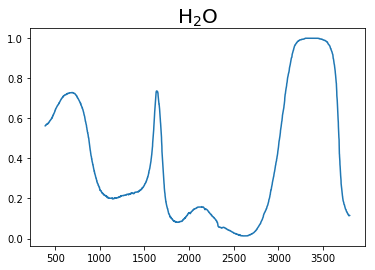

In [6]:
plt.plot(data2['x'], data2['y'])
plt.title('H$_{2}$O', fontsize=20)

In [7]:
data3 = jcamp.JCAMP_reader('74-82-8-IR.jdx')

In [8]:
y_abs = 1 - data3['y']
data3['yunits'] = 'ABSORBANCE'
data3['y'] = y_abs

Text(0.5, 1.0, 'methane')

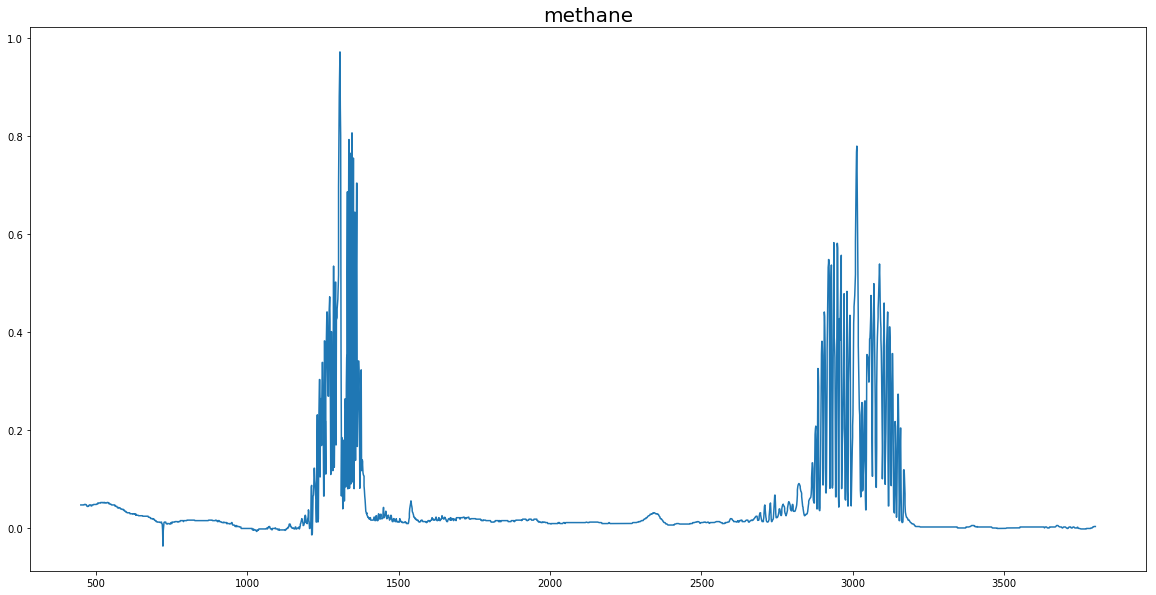

In [9]:
plt.figure(figsize=(20,10))
plt.plot(data3['x'], data3['y'])
plt.title('methane', fontsize=20)

In [10]:
data4 = jcamp.JCAMP_reader('124-38-9-IR.jdx')

In [11]:
y_abs = 1 - data4['y']
data4['yunits'] = 'ABSORBANCE'
data4['y'] = y_abs
data4

{'title': 'CARBON DIOXIDE',
 'jcamp-dx': 4.24,
 'data type': 'INFRARED SPECTRUM',
 'class': 'COBLENTZ',
 'origin': 'DOW CHEMICAL COMPANY',
 'owner': 'COBLENTZ SOCIETY',
 'date': 1964,
 'names': 'dioxomethane',
 'cas registry no': '124-38-9',
 'molform': 'C O2',
 'source reference': 'COBLENTZ NO. 8753',
 '$nist source': 'COBLENTZ',
 '$nist image': 'cob8753',
 'spectrometer/data system': 'DOW KBr FOREPRISM',
 'instrument parameters': 'GRATING CHANGED AT 5.0, 7.5, 15.0 MICRON',
 'state': 'GAS (200 mmHg DILUTED TO A TOTAL PRESSURE OF 600 mmHg WITH N2)',
 'path length': '10 CM',
 'sampling procedure': 'TRANSMISSION',
 'resolution': 4,
 'data processing': 'DIGITIZED BY NIST FROM HARD COPY (FROM TWO SEGMENTS)',
 'xunits': '1/CM',
 'yunits': 'ABSORBANCE',
 'xfactor': 1.0,
 'yfactor': 1,
 'deltax': 0.934582,
 'firstx': 458.879,
 'lastx': 3797.21,
 'firsty': 0.973,
 'maxx': 3797.21,
 'minx': 458.879,
 'maxy': 1.023,
 'miny': 0.018,
 'npoints': 3573,
 'xydata': '(X++(Y..Y))',
 'end': '',
 'x': ar

3573


Text(0.5, 1.0, 'C02')

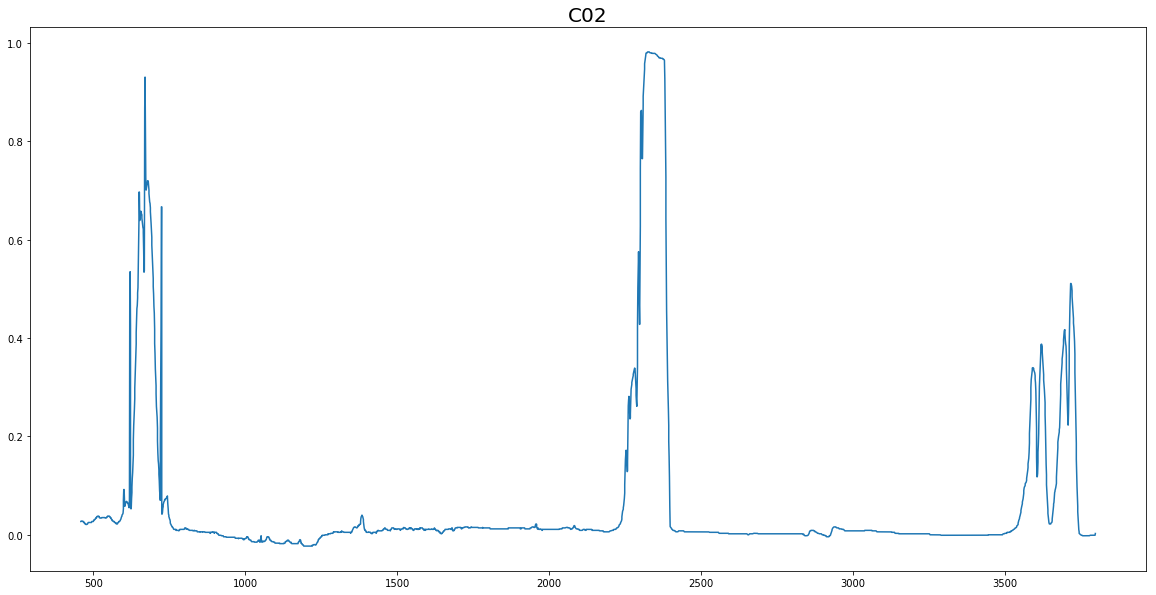

In [12]:
plt.figure(figsize=(20,10))
print(data4['y'].size)
plt.plot(data4['x'], data4['y'])
plt.title('C02', fontsize=20)

In [13]:
# Importing the functions
import numpy
import peakutils
from peakutils.plot import plot as pplot
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
#Getting a first estimate of the peaks
#By using peakutils.indexes, we can get the indexes of the peaks from the data. Due to the noise, it will be just a rough
#approximation
selectminX0=data4['x'].min()
selectmedX1=900
selectmedX2=3400
selectmaxX3=data4['x'].max()
xrange1=range(0,data4['x'].size-(selectmedX2-selectmedX1))
xrange2=range(data4['x'].size-(selectmedX2-selectmedX1),data4['x'].size-selectmedX1)
xrange3=range(data4['x'].size-selectmedX1,data4['x'].size)
print(xrange1)
print(xrange2)
print(xrange3)
indexes = peakutils.indexes(data4['y'], thres=0.35, min_dist=10)
indexes1 = peakutils.indexes(data4['y'][xrange1], thres=0.35, min_dist=10)
indexes2 = peakutils.indexes(data4['y'][xrange2], thres=0.35, min_dist=10)
indexes3 = peakutils.indexes(data4['y'][xrange3], thres=0.35, min_dist=10)
print(indexes)
print(data4['x'][indexes], data4['y'][indexes])
print(indexes1)
print(data4['x'][indexes1], data4['y'][indexes1])
print(indexes2)
print(data4['x'][indexes2], data4['y'][indexes2])
print(indexes3)
print(data4['x'][indexes3], data4['y'][indexes3])
plt.figure(figsize=(10,6))
figure, axs = plt.subplots(nrows=2, ncols=2, sharex=False, sharey=False, figsize = (15,10))
plt.subplots_adjust(wspace=.5, hspace=.5) 
axs[0][0].scatter(data4['x'][indexes], data4['y'][indexes], marker='+',color='r',label='{} peaks'.format(len(indexes)))#,ms=5, mew=2) #label='{} peaks'.format(len(indexes)))
axs[0][0].plot(data4['x'], data4['y'])
axs[0][0].legend()
axs[0][0].set_xlim(selectminX0,selectmaxX3)
axs[0][0].set_xlabel('1/CM') # sets xlabel
axs[0][0].set_ylabel('ABSORBANCE') # sets ylabel 
axs[0][0].set_title('Whole Set of CO2 Raman peaks') # sets title 

axs[1][0].plot(data4['x'][xrange1], data4['y'][xrange1])
axs[1][0].scatter(data4['x'][xrange1][indexes1], data4['y'][xrange1][indexes1], marker='+',color='r',label='{} peaks'.format(len(indexes1)))#,ms=5,
axs[1][0].legend()
axs[1][0].set_xlim(selectminX0,selectmedX1) 
axs[1][0].set_xlabel('1/CM') # sets xlabel 
axs[1][0].set_ylabel('ABSORBANCE') # sets ylabel 
axs[1][0].set_title('First Set of CO2 Raman peaks') # sets title 

axs[0][1].plot(data4['x'][xrange2], data4['y'][xrange2])
axs[0][1].scatter(data4['x'][xrange2][indexes2], data4['y'][xrange2][indexes2], marker='+',color='r',label='{} peaks'.format(len(indexes2)))#,ms=5,
axs[0][1].legend()
axs[0][1].set_xlim(1500,2700) 
axs[0][1].set_xlabel('1/CM') # sets xlabel
axs[0][1].set_ylabel('ABSORBANCE') # sets ylabel 
axs[0][1].set_title('Second Set of CO2 Raman peaks') # sets title 

axs[1][1].plot(data4['x'], data4['y'])
axs[1][1].scatter(data4['x'][xrange3][indexes3], data4['y'][xrange3][indexes3], marker='+',color='r',label='{} peaks'.format(len(indexes3)))#,ms=5,
axs[1][1].legend()
axs[1][1].set_xlim(selectmedX2,selectmaxX3) 
axs[1][1].set_xlabel('1/CM') # sets xlabel 
axs[1][1].set_ylabel('ABSORBANCE') # sets ylabel 
axs[1][1].set_title('Third Set of CO2 Raman peaks') # sets title 



range(0, 1073)
range(1073, 2673)
range(2673, 3573)
[ 173  206  226  284 1973 3352 3382]
[ 621.262686   651.636613   670.32826    725.234974  2303.510942
 3592.0663765 3620.1038475] [0.535  0.697  0.9308 0.667  0.863  0.3398 0.3877]
[173 206 226 284]
[621.262686 651.636613 670.32826  725.234974] [0.535  0.697  0.9308 0.667 ]
[900]
[1300.003128] [0.006]
[679 709]
[1094.395008 1122.432479] [-0.015 -0.018]


Text(0.5, 1.0, 'Third Set of CO2 Raman peaks')

<Figure size 720x432 with 0 Axes>

In [15]:
# Enhancing the resolution by interpolation
# We can enhance the resolution by using interpolation. We will try to fit a Gaussian near each previously detected peak.
peaks_x = peakutils.interpolate(data4['x'],data4['y'], ind=indexes)
print(peaks_x)
peaks_x1 = peakutils.interpolate(data4['x'][xrange1],data4['y'][xrange1], ind=indexes1)
print(peaks_x1)
peaks_x2 = peakutils.interpolate(data4['x'][xrange2],data4['y'][xrange2], ind=indexes2)
print(peaks_x2)
peaks_x3 = peakutils.interpolate(data4['x'][xrange3],data4['y'][xrange3], ind=indexes3)
print(peaks_x3)

[   620.85668096    655.52957991    673.29402521 -49908.71052518
   2311.4796971    3593.41643805   3620.8046306 ]
[   620.85668096    655.52957991    673.29402521 -49908.71052518]
[2311.4796971]
[3593.41643805 3620.8046306 ]


C:\Users\user1\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:787: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


In [16]:
#Getting a first estimate of the peaks
#By using peakutils.indexes, we can get the indexes of the peaks from the data. Due to the noise, it will be just a rough
#approximation
selectminX0=data3['x'].min()
selectmedX1=900
selectmedX2=3400
selectmaxX3=data3['x'].max()
xrange1=range(0,data3['x'].size-(selectmedX2-selectmedX1))
xrange2=range(data3['x'].size-(selectmedX2-selectmedX1),data3['x'].size-selectmedX1)
xrange3=range(data3['x'].size-selectmedX1,data3['x'].size)
print(xrange1)
print(xrange2)
print(xrange3)
indexes = peakutils.indexes(data3['y'], thres=0.35, min_dist=10)
indexes1 = peakutils.indexes(data3['y'][xrange1], thres=0.35, min_dist=10)
indexes2 = peakutils.indexes(data3['y'][xrange2], thres=0.35, min_dist=10)
indexes3 = peakutils.indexes(data3['y'][xrange3], thres=0.35, min_dist=10)
print(indexes)
print(data3['x'][indexes], data3['y'][indexes])
print(indexes1)
print(data3['x'][indexes1], data3['y'][indexes1])
print(indexes2)
print(data3['x'][indexes2], data3['y'][indexes2])
print(indexes3)
print(data3['x'][indexes3], data3['y'][indexes3])
plt.figure(figsize=(10,6))
figure, axs = plt.subplots(nrows=1, ncols=1, sharex=False, sharey=False, figsize = (15,10))
plt.subplots_adjust(wspace=.5, hspace=.5) 
axs.scatter(data3['x'][indexes], data3['y'][indexes], marker='+',color='r',label='{} peaks'.format(len(indexes)))#,ms=5, mew=2) #label='{} peaks'.format(len(indexes)))
axs.plot(data3['x'], data3['y'])
axs.legend()
axs.set_xlim(selectminX0,selectmaxX3)
axs.set_xlabel('1/CM') # sets xlabel
axs.set_ylabel('ABSORBANCE') # sets ylabel 
axs.set_title('Whole Set of Methane Raman peaks') # sets title 

    #axs[0][1].plot(data3['x'][xrange1], data3['y'][xrange1])
    #axs[0][1].scatter(data3['x'][xrange1][indexes1], data3['y'][xrange1][indexes1], marker='+',color='r',label='{} peaks'.format(len(indexes1)))#,ms=5,
    #axs[0][1].legend()
    #axs[0][1].set_xlim(selectminX0,selectmedX1) 
    #axs[0][1].set_xlabel('1/CM') # sets xlabel 
    #axs[0][1].set_ylabel('ABSORBANCE') # sets ylabel 
    #axs[0][1].set_title('First Set of Methane Raman peaks') # sets title 

    #axs[0][2].plot(data3['x'][xrange2], data3['y'][xrange2])
    #axs[0][2].scatter(data3['x'][xrange2][indexes2], data3['y'][xrange2][indexes2], marker='+',color='r',label='{} peaks'.format(len(indexes2)))#,ms=5,
    #axs[0][2].legend()
    #axs[0][2].set_xlim(1500,2700) 
    #axs[0][2].set_xlabel('1/CM') # sets xlabel
    #axs[0][2].set_ylabel('ABSORBANCE') # sets ylabel 
    #axs[0][2].set_title('Second Set of Methane Raman peaks') # sets title 




range(0, 1083)
range(1083, 2683)
range(2683, 3583)
[ 860  878  892  941  957  980 2602 2658 2684 2704 2740 2800 2836 2848]
[1254.213144   1271.75841625 1284.6249485  1330.24265575 1345.4485585
 1366.502885   2884.753758   2937.38957425 2961.952955   2980.667912
 3013.419086   3069.563957   3103.48481575 3115.18166425] [0.382  0.472  0.5347 0.6864 0.8067 0.341  0.3256 0.5826 0.5568 0.4831
 0.7797 0.4989 0.4593 0.441 ]
[860 878 892 941 957 980]
[1254.213144   1271.75841625 1284.6249485  1330.24265575 1345.4485585
 1366.502885  ] [0.382  0.472  0.5347 0.6864 0.8067 0.341 ]
[1519 1575 1595]
[1871.806719 1923.272851 1941.987808] [0.015 0.015 0.016]
[  1  21  57 117 153 165]
[450.63968475 469.35464175 503.275501   559.4203715  593.34123025
 603.868394  ] [0.047 0.045 0.049 0.047 0.035 0.031]


Text(0.5, 1.0, 'Whole Set of Methane Raman peaks')

<Figure size 720x432 with 0 Axes>

In [17]:
# Enhancing the resolution by interpolation
# We can enhance the resolution by using interpolation. We will try to fit a Gaussian near each previously detected peak.
# peaks_x = peakutils.interpolate(data3['x'],data3['y'], ind=indexes)
# print(peaks_x)
# peaks_x1 = peakutils.interpolate(data3['x'][xrange1],data3['y'][xrange1], ind=indexes1)
# print(peaks_x1)
# peaks_x2 = peakutils.interpolate(data3['x'][xrange2],data3['y'][xrange2], ind=indexes2)
# print(peaks_x2)
# peaks_x3 = peakutils.interpolate(data3['x'][xrange3],data3['y'][xrange3], ind=indexes3)
# print(peaks_x3)

---------------------------------------------------------------------------
RuntimeError                              Traceback (most recent call last)
<ipython-input-15-b0e0e087144a> in <module>
      1 # Enhancing the resolution by interpolation
      2 # We can enhance the resolution by using interpolation. We will try to fit a Gaussian near each previously detected peak.
----> 3 peaks_x = peakutils.interpolate(x, y, ind=indexes)
      4 print(peaks_x)

~\Anaconda3\lib\site-packages\PeakUtils-1.0.3-py3.6.egg\peakutils\peak.py in interpolate(x, y, ind, width, func)
    179     out = []
    180     for slice_ in (slice(i - width, i + width) for i in ind):
--> 181         fit = func(x[slice_], y[slice_])
    182         out.append(fit)
    183 

~\Anaconda3\lib\site-packages\PeakUtils-1.0.3-py3.6.egg\peakutils\peak.py in gaussian_fit(x, y, center_only)
    141     '''
    142     initial = [np.max(y), x[0], (x[1] - x[0]) * 5]
--> 143     params, pcov = optimize.curve_fit(gaussian, x, y, initial)
    144 
    145     if center_only:

~\Anaconda3\lib\site-packages\scipy\optimize\minpack.py in curve_fit(f, xdata, ydata, p0, sigma, absolute_sigma, check_finite, bounds, method, jac, **kwargs)
    746         cost = np.sum(infodict['fvec'] ** 2)
    747         if ier not in [1, 2, 3, 4]:
--> 748             raise RuntimeError("Optimal parameters not found: " + errmsg)
    749     else:
    750         # Rename maxfev (leastsq) to max_nfev (least_squares), if specified.

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 800.

Text(0.5, 1.0, 'Data with noise')

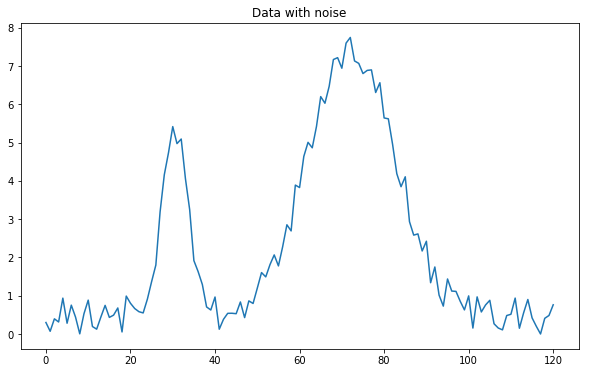

In [18]:
# Lets generate some noisy data from two Gaussians:
import numpy
import peakutils
from peakutils.plot import plot as pplot
from matplotlib import pyplot
centers = (30.5, 72.3)
x = numpy.linspace(0, 120, 121)
y = (peakutils.gaussian(x, 5, centers[0], 3) +
peakutils.gaussian(x, 7, centers[1], 10) +
numpy.random.rand(x.size))
pyplot.figure(figsize=(10,6))
pyplot.plot(x, y)
pyplot.title("Data with noise")

In [19]:
#Getting a first estimate of the peaks
#By using peakutils.indexes, we can get the indexes of the peaks from the data. Due to the noise, it will be just a rough
#approximation
indexes = peakutils.indexes(y, thres=0.5, min_dist=30)
print(indexes)
print(x[indexes], y[indexes])
pyplot.figure(figsize=(10,6))
pplot(x, y, indexes)
pyplot.title('First estimate')

[30 72]
[30. 72.] [5.41733661 7.74456935]


Text(0.5, 1.0, 'First estimate')

In [20]:
# Enhancing the resolution by interpolation
# We can enhance the resolution by using interpolation. We will try to fit a Gaussian near each previously detected peak.
peaks_x = peakutils.interpolate(x, y, ind=indexes)
print(peaks_x)


[30.57487429 72.36106251]


Text(0.5, 1.0, 'Data with baseline')

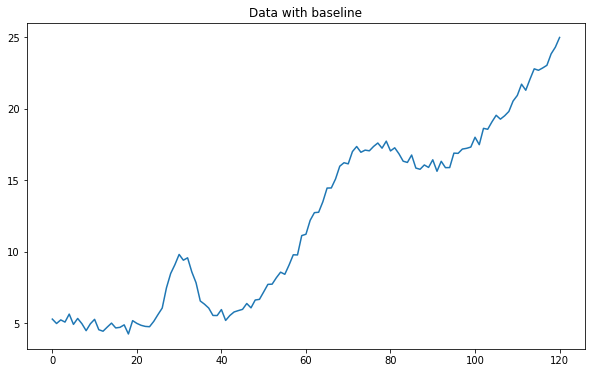

In [21]:
#Data with baseline
y2 = y + numpy.polyval([0.002,-0.08,5], x)
pyplot.figure(figsize=(10,6))
pyplot.plot(x, y2)
pyplot.title("Data with baseline")

In [22]:
#Data with baseline removed
base = peakutils.baseline(y2, 2)
pyplot.figure(figsize=(10,6))
pyplot.plot(x, y2-base)
pyplot.title("Data with baseline removed")

Text(0.5, 1.0, 'Data with baseline removed')

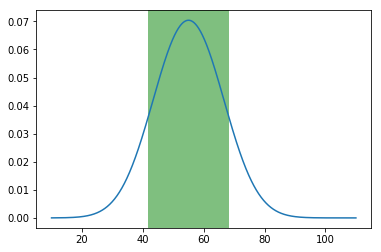

26.891157007233254


In [40]:
import numpy as np
from scipy.interpolate import UnivariateSpline

def make_norm_dist(x, mean, sd):
    return 1.0/(sd*np.sqrt(2*np.pi))*np.exp(-(x - mean)**2/(2*sd**2))

x = np.linspace(10, 110, 1000)
green = make_norm_dist(x, 50, 10)
pink = make_norm_dist(x, 60, 10)

blue = green + pink   

# create a spline of x and blue-np.max(blue)/2 
spline = UnivariateSpline(x, blue-np.max(blue)/2, s=0)
r1, r2 = spline.roots() # find the roots

import pylab as pl
pl.plot(x, blue)
pl.axvspan(r1, r2, facecolor='g', alpha=0.5)
pl.show()
print(r2-r1)

In [29]:
shoyu.initialize_standard_library()
# import data dict
shoyu_data_dict = pickle.load(open('raman_spectra/shoyu_data_dict.p', 'rb'))
sorted(shoyu_data_dict.keys())
data = shoyu_data_dict['CARBON MONOXIDE']


file already in raman_spectra folder
WATER added to shoyu_data_dict.p
file already in raman_spectra folder
CARBON MONOXIDE added to shoyu_data_dict.p
file already in raman_spectra folder
CARBON DIOXIDE added to shoyu_data_dict.p
file already in raman_spectra folder
FORMIC ACID added to shoyu_data_dict.p
file already in raman_spectra folder
2-PROPANOL added to shoyu_data_dict.p
file already in raman_spectra folder
ETHYL ALCOHOL added to shoyu_data_dict.p
file already in raman_spectra folder
DIMETHYL KETONE added to shoyu_data_dict.p


[2119.854823 2176.03476 ]
[0.854 0.854]
[2119.02188167 2177.35451609]


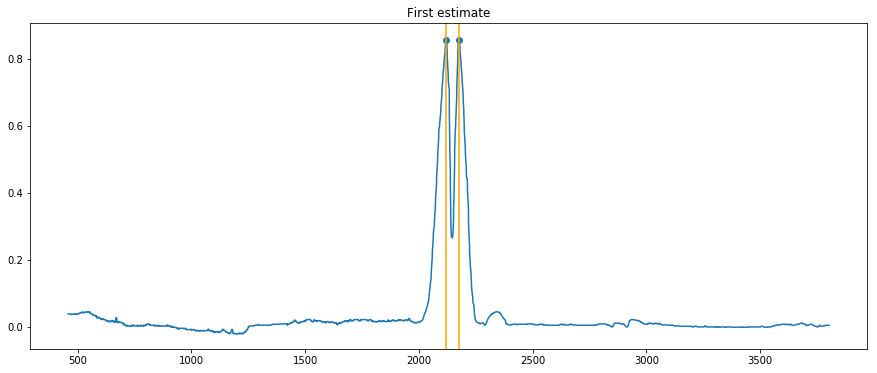

In [36]:
indexes = peakutils.indexes(data['y'], thres=0.4, min_dist=10)
plt.figure(figsize=(15,6))
plt.plot(data['x'], data['y'])
plt.scatter(data['x'][indexes], data['y'][indexes])
pyplot.title('First estimate')
peak_location =data['x'][indexes]
peak_height = data['y'][indexes]
print(peak_location)
print(peak_height)
# We can enhance the resolution by using interpolation. We will try to fit a Gaussian near each previously detected peak.
peaks_x = peakutils.interpolate(data['x'], data['y'], ind=indexes)
print(peaks_x)
for i in indexes:
    peak_index = data['x'][i]
    plt.axvline(x=peak_index, color='orange')